# Q: Is my 75+ grandpa in Olomouc or my grandpa in Prague in a bigger risk of dying from COVID-19?

**Q1: Where is he more likely to catch it? Answered: Equally likely in both cities! [this notebook]**<br>
Q2: If he caught it, where are people of 75+ more frequently hospitalised?<br>
Q3: If hospitalised, where are people of 75+ more frequently dying?<br>
<br>
Need the following data:<br>
* number of people in O and in P *(got it)*
* incidence in O and in P per number of people in the city *(got it)*
* number of hospitalised 75+ people in Olomouc and in Prague *(cannot get)*
* number of hospitalised people in Olomouc and in Prague *(got it)*
* number of hospitalised deaths in 75+ people in Olomouc and in Prague *(got it)*
* number of deaths in 75+ people in Olomouc and in Prague *(got it)*

TO DO:<br>
* Find out and resolve SettingWithCopy *(done)*
* Find out lau versus orp for exact population and correct *(done)*
* What is the '_7' and its significance? *(done)*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# kod okresu
lau_Prg = 'CZ0100'
lau_Olo = 'CZ0712' 
# populace okresu
# http://www.kdekoliv.cz/okres.php?id_okres=CZ0100 1117063
# http://www.kdekoliv.cz/okres.php?id_okres=CZ0712 231742
pop_Prg = 1117063
pop_Olo = 231742

In [3]:
df = pd.read_csv('..\\00-source-data\\osoby.csv')
df = df.drop(columns=['nakaza_v_zahranici', 'nakaza_zeme_csu_kod', 'kraj_nuts_kod', 'pohlavi'])
df.head()

,datum,vek,okres_lau_kod
0,2020-10-11,39,CZ0806
1,2020-09-26,68,CZ0712
2,2020-06-26,46,CZ0209
3,2020-10-13,86,CZ0423
4,2020-09-23,50,CZ0645


In [4]:
df['okres_lau_kod'].nunique()

78

In [5]:
df['datum'].nunique()

227

In [6]:
len(df)

126514

In [7]:
df['vek'].nunique()

106

# How many cases are in Olomouc?

In [8]:
df_Olo = df.loc[df['okres_lau_kod'] == lau_Olo]
df_Olo.head()

,datum,vek,okres_lau_kod
1,2020-09-26,68,CZ0712
43,2020-09-22,29,CZ0712
61,2020-03-14,68,CZ0712
113,2020-09-22,15,CZ0712
134,2020-09-30,18,CZ0712


In [9]:
df_Olo = df_Olo.drop(columns=['okres_lau_kod'])
df_Olo.tail()

,datum,vek
126409,2020-09-24,60
126421,2020-09-21,67
126464,2020-10-12,34
126472,2020-10-07,64
126485,2020-03-27,68


In [10]:
df_Olo.dtypes

datum    object
vek       int64
dtype: object

In [11]:
df_Olo['datum'] = df_Olo['datum'].apply(pd.to_datetime)
df_Olo.dtypes

datum    datetime64[ns]
vek               int64
dtype: object

In [12]:
df_Olo_byDate = df_Olo.groupby('datum', as_index=False).count()
df_Olo_byDate.head()

,datum,vek
0,2020-03-08,1
1,2020-03-10,2
2,2020-03-11,1
3,2020-03-13,2
4,2020-03-14,12


In [13]:
df_Olo_byDate = df_Olo_byDate.rename(columns={'vek':'number'})
df_Olo_byDate.tail()

,datum,number
160,2020-10-10,62
161,2020-10-11,23
162,2020-10-12,202
163,2020-10-13,82
164,2020-10-14,184


In [14]:
df_Olo_byDate.dtypes

datum     datetime64[ns]
number             int64
dtype: object

Text(0.5, 0, 'Datum')

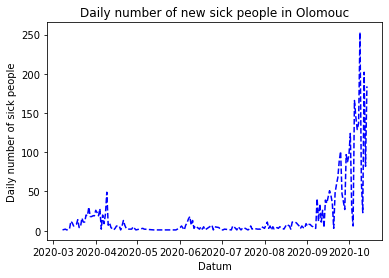

In [15]:
plt.plot(df_Olo_byDate['datum'], df_Olo_byDate['number'], 'b--')
plt.title('Daily number of new sick people in Olomouc')
plt.ylabel('Daily number of sick people')
plt.xlabel('Datum')

# How many cases are in Prague?

In [16]:
df_Prg = df.loc[df['okres_lau_kod'] == lau_Prg]
df_Prg = df_Prg.drop(columns=['okres_lau_kod'])
df_Prg['datum'] = df_Prg['datum'].apply(pd.to_datetime)

df_Prg_byDate = df_Prg.groupby('datum', as_index=False).count()
df_Prg_byDate = df_Prg_byDate.rename(columns={'vek':'number'})
df_Prg_byDate.head()

,datum,number
0,2020-03-01,2
1,2020-03-04,1
2,2020-03-06,8
3,2020-03-07,4
4,2020-03-09,4


In [17]:
df_Prg_byDate.dtypes

datum     datetime64[ns]
number             int64
dtype: object

Text(0.5, 0, 'Date')

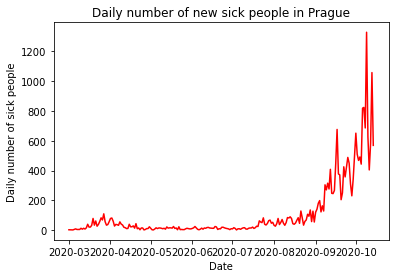

In [18]:
plt.plot(df_Prg_byDate['datum'], df_Prg_byDate['number'], 'r')
plt.title('Daily number of new sick people in Prague')
plt.ylabel('Daily number of sick people')
plt.xlabel('Date')

# Visualise both in one graph

Text(0.5, 0, 'Date')

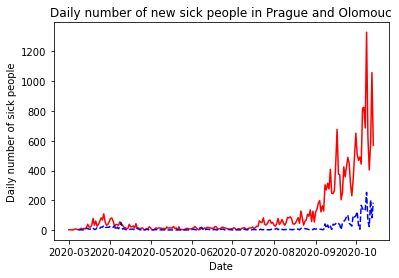

In [19]:
plt.plot(df_Prg_byDate['datum'], df_Prg_byDate['number'], 'r', df_Olo_byDate['datum'], df_Olo_byDate['number'], 'b--')
plt.title('Daily number of new sick people in Prague and Olomouc')
plt.ylabel('Daily number of sick people')
plt.xlabel('Date')

plot with a legend:

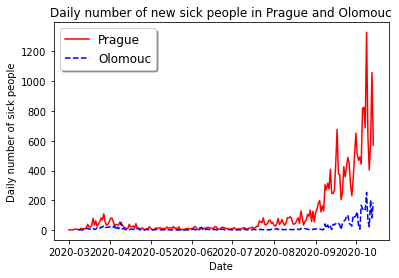

In [20]:
fig, ax = plt.subplots()
ax.plot(df_Prg_byDate['datum'], df_Prg_byDate['number'], 'r', label='Prague')
ax.plot(df_Olo_byDate['datum'], df_Olo_byDate['number'], 'b--', label='Olomouc')

legend = ax.legend(loc='upper left', shadow=True, fontsize='large')

plt.title('Daily number of new sick people in Prague and Olomouc')
plt.xlabel('Date')
plt.ylabel('Daily number of sick people')

plt.show()

# Adjust the numbers by population size

In [21]:
df_Olo_byDate.head()

,datum,number
0,2020-03-08,1
1,2020-03-10,2
2,2020-03-11,1
3,2020-03-13,2
4,2020-03-14,12


In [22]:
df_Olo_byDate.dtypes

datum     datetime64[ns]
number             int64
dtype: object

In [23]:
df_Olo_byDate['number_adjusted'] = df_Olo_byDate['number'] / pop_Olo
df_Olo_byDate.head()

,datum,number,number_adjusted
0,2020-03-08,1,0.000004
1,2020-03-10,2,0.000009
2,2020-03-11,1,0.000004
3,2020-03-13,2,0.000009
4,2020-03-14,12,0.000052


In [24]:
df_Prg_byDate['number_adjusted'] = df_Prg_byDate['number'] / pop_Prg
df_Prg_byDate.head()

,datum,number,number_adjusted
0,2020-03-01,2,1.790409e-06
1,2020-03-04,1,8.952047e-07
2,2020-03-06,8,7.161637e-06
3,2020-03-07,4,3.580819e-06
4,2020-03-09,4,3.580819e-06


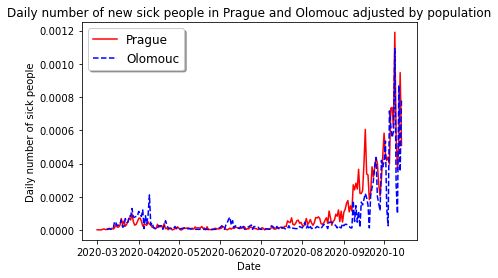

In [25]:
fig, ax = plt.subplots()
ax.plot(df_Prg_byDate['datum'], df_Prg_byDate['number_adjusted'], 'r', label='Prague')
ax.plot(df_Olo_byDate['datum'], df_Olo_byDate['number_adjusted'], 'b--', label='Olomouc')

legend = ax.legend(loc='upper left', shadow=True, fontsize='large')

plt.title('Daily number of new sick people in Prague and Olomouc adjusted by population')
plt.xlabel('Date')
plt.ylabel('Daily number of sick people')

plt.show()

# Is this significantly similar? A: Yes.

In [26]:
print(len(df_Prg_byDate.index), len(df_Olo_byDate.index))

224 165


In [27]:
df_Olo_byDate = df_Olo_byDate.rename(columns={'number':'number_Olo', 'number_adjusted':'number_adjusted_Olo'})
df_Olo_byDate.head()

,datum,number_Olo,number_adjusted_Olo
0,2020-03-08,1,0.000004
1,2020-03-10,2,0.000009
2,2020-03-11,1,0.000004
3,2020-03-13,2,0.000009
4,2020-03-14,12,0.000052


In [28]:
df_Prg_byDate = df_Prg_byDate.rename(columns={'number':'number_Prg', 'number_adjusted':'number_adjusted_Prg'})
df_Prg_byDate.head()

,datum,number_Prg,number_adjusted_Prg
0,2020-03-01,2,1.790409e-06
1,2020-03-04,1,8.952047e-07
2,2020-03-06,8,7.161637e-06
3,2020-03-07,4,3.580819e-06
4,2020-03-09,4,3.580819e-06


In [29]:
df_merged = pd.concat([df_Prg_byDate, df_Olo_byDate], axis=1, sort=False)

df_merged.head()

,datum,number_Prg,number_adjusted_Prg,datum,number_Olo,number_adjusted_Olo
0,2020-03-01,2,1.790409e-06,2020-03-08,1.0,0.000004
1,2020-03-04,1,8.952047e-07,2020-03-10,2.0,0.000009
2,2020-03-06,8,7.161637e-06,2020-03-11,1.0,0.000004
3,2020-03-07,4,3.580819e-06,2020-03-13,2.0,0.000009
4,2020-03-09,4,3.580819e-06,2020-03-14,12.0,0.000052


In [30]:
len(df_merged)

224

In [31]:
df_merged.isnull().sum()

datum                   0
number_Prg              0
number_adjusted_Prg     0
datum                  59
number_Olo             59
number_adjusted_Olo    59
dtype: int64

In [32]:
df_merged.corr()

,number_Prg,number_adjusted_Prg,number_Olo,number_adjusted_Olo
number_Prg,1.00000,1.00000,0.52887,0.52887
number_adjusted_Prg,1.00000,1.00000,0.52887,0.52887
number_Olo,0.52887,0.52887,1.00000,1.00000
number_adjusted_Olo,0.52887,0.52887,1.00000,1.00000


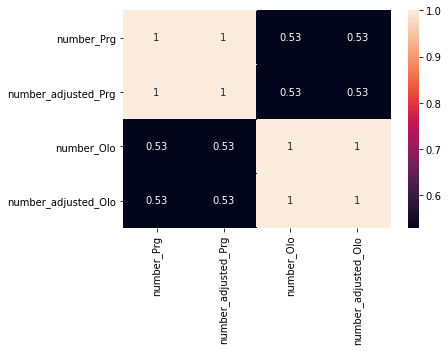

In [33]:
import seaborn as sn
corrMatrix = df_merged.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [34]:
df_merged_clean = df_merged[['number_adjusted_Prg', 'number_adjusted_Olo']]
df_merged_clean.head(10)

,number_adjusted_Prg,number_adjusted_Olo
0,1.790409e-06,0.000004
1,8.952047e-07,0.000009
2,7.161637e-06,0.000004
3,3.580819e-06,0.000009
4,3.580819e-06,0.000052
5,1.074246e-05,0.000043
6,5.371228e-06,0.000026
7,1.074246e-05,0.000035
8,6.266433e-06,0.000060
9,1.342807e-05,0.000017


In [35]:
df_merged_clean.corr()

,number_adjusted_Prg,number_adjusted_Olo
number_adjusted_Prg,1.00000,0.52887
number_adjusted_Olo,0.52887,1.00000


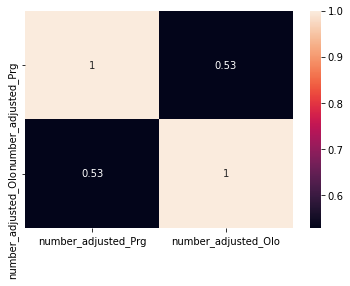

In [36]:
import seaborn as sn
corrMatrix = df_merged_clean.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [37]:
#drop lines with null values
df_merged_clean = df_merged_clean.dropna()
df_merged_clean.head(10)

,number_adjusted_Prg,number_adjusted_Olo
0,1.790409e-06,0.000004
1,8.952047e-07,0.000009
2,7.161637e-06,0.000004
3,3.580819e-06,0.000009
4,3.580819e-06,0.000052
5,1.074246e-05,0.000043
6,5.371228e-06,0.000026
7,1.074246e-05,0.000035
8,6.266433e-06,0.000060
9,1.342807e-05,0.000017


In [38]:
df_merged_clean.isnull().sum()

number_adjusted_Prg    0
number_adjusted_Olo    0
dtype: int64

In [39]:
import scipy.stats as stats
stats.pearsonr(df_merged_clean['number_adjusted_Prg'], df_merged_clean['number_adjusted_Olo'])

(0.5288699285635903, 2.834472479781317e-13)

In [40]:
r_20201009 = 0.7521490476247261
p_20201009 = 1.0881912443295733e-29
r_20201011 = 0.8681118180495841
p_20201011 = 6.303139370072671e-50